In [1]:
%matplotlib inline

In [2]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn import linear_model

# #############################################################################
# Generate sample data
n_samples_train, n_samples_test, n_features = 75, 150, 500
np.random.seed(0)
coef = np.random.randn(n_features)
coef[50:] = 0.0  # only the top 10 features are impacting the model
X = np.random.randn(n_samples_train + n_samples_test, n_features)
y = np.dot(X, coef)

# Split train and test data
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]

# #############################################################################
# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.6)
# ElasticNet: Linear regression with combined L1 and L2 priors as regularizer.
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
# telescopeuser
# print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_


Automatically created module for IPython interactive environment


/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/sklearn/line

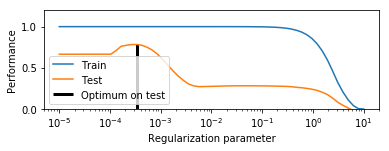

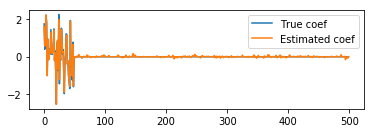

Optimal regularization parameter : 0.000335292414925


In [3]:
import matplotlib.pyplot as plt

# Show model performance by different regularization parameter
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
# plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend()
# plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

print("Optimal regularization parameter : %s" % alpha_optim)